<a href="https://colab.research.google.com/github/Samara332/COMPOSITE/blob/main/HACKATHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTAMOS LIBRERIAS
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random
from google.colab import files
from google.colab import drive


In [ ]:
#OBTENIENDO DATASET
uploaded= files.upload()



Saving data.zip to data.zip


In [ ]:
#DESCOMPRIMIENDO EL ZIP
!unzip data.zip

In [ ]:
n ,  yic i i H iYgc#GUARDANDO EN DRIVE
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


In [ ]:
TRAINING_DIR = "/content/data/training_data/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode ='nearest'
)
VALIDATION_DIR = "/content/data/validation_data/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
 TRAINING_DIR,
 target_size=(70,70),
 class_mode='categorical',
 batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
 VALIDATION_DIR,
 target_size=(70,70),
 class_mode='categorical',
 batch_size=126
)


Found 7594 images belonging to 2 classes.
Found 3658 images belonging to 2 classes.


In [ ]:
images, labels = next(train_generator)

In [ ]:
print(labels[18])

[1. 0.]


31


<function matplotlib.pyplot.show>

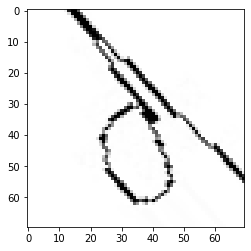

In [ ]:
pos= random.randint(0,len(images))
print(pos)
plt.imshow(images[pos])
plt.show

In [ ]:
model = tf.keras.models.Sequential([
    #CAPAS DE CONCOLUCION                                
    # IMAGENES DE 150*150
    # PRIMER CAPA
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(70, 70, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # SEGUNDA CAPA
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # TERCER CAPA
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # CUARTA CAPA
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # APLANANDO EL RESULTADO
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 NEURONAS EN LA CAPA OCULTA
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 68, 68, 64)        1792      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 34, 34, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 7, 7, 128)       

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])




In [ ]:
model_history = model.fit(train_generator, epochs= 30, validation_data=validation_generator,verbose=1,validation_steps=1)

Epoch 1/30
61/61 [==============================] - 99s 2s/step - loss: 0.3596 - accuracy: 0.8204 - val_loss: 0.1103 - val_accuracy: 0.9841
Epoch 2/30
61/61 [==============================] - 96s 2s/step - loss: 0.1809 - accuracy: 0.9324 - val_loss: 0.1654 - val_accuracy: 0.9365
Epoch 3/30
61/61 [==============================] - 96s 2s/step - loss: 0.1246 - accuracy: 0.9583 - val_loss: 0.1967 - val_accuracy: 0.9206
Epoch 4/30
61/61 [==============================] - 96s 2s/step - loss: 0.1198 - accuracy: 0.9576 - val_loss: 0.6140 - val_accuracy: 0.8016
Epoch 5/30
61/61 [==============================] - 96s 2s/step - loss: 0.1017 - accuracy: 0.9672 - val_loss: 0.7907 - val_accuracy: 0.7460
Epoch 6/30
61/61 [==============================] - 96s 2s/step - loss: 0.0785 - accuracy: 0.9738 - val_loss: 0.2138 - val_accuracy: 0.9127
Epoch 7/30
61/61 [==============================] - 96s 2s/step - loss: 0.0934 - accuracy: 0.9692 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 8/30
61/61 [==

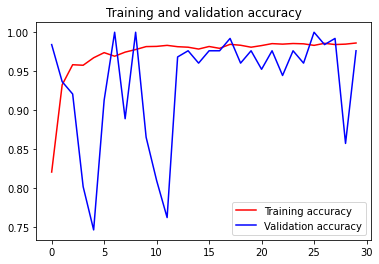

<Figure size 432x288 with 0 Axes>

In [ ]:
#PLOTEO VALIDATION VS TRAINING
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
#PREDICCIÓN
predict = model.predict(validation_generator)

In [ ]:
model.save('hackathon.h5')

In [ ]:
#IMPORTAR
!pip install tensorflowjs

In [ ]:
mkdir mi_modelo

In [ ]:
!tensorflowjs_converter --input_format keras hackathon.h5 mi_modelo

In [ ]:
images, labels =next(validation_generator)

70


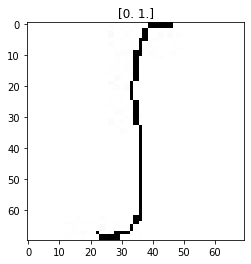

In [ ]:
pos = random.randint(0,len(images))
print(pos)
plt.imshow(images[pos], cmap='binary')
plt.title(f'{labels[pos]}')
plt.show()

In [ ]:
print(predict[pos])
res =[round(x,4) for x in predict[pos]]
print(res)
res_lbl = 'Derivative' if np.argmax(predict[pos])==0 else 'Integral'
print(np.argmax(predict[pos]))
print(res_lbl)

[1.895783e-10 1.000000e+00]
[0.0, 1.0]
1
Integral
